In [1]:
import fastf1 as ff1

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Enable the cache
ff1.Cache.enable_cache('/home/rajaahdjey/Documents/DS_Proj/GitHub/F1 Analysis/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

In [4]:
#engine manufacturers list for analysis

engine_dict = {'Red Bull Racing' : 'Red Bull',
               'Mercedes' : 'Mercedes',
               'Ferrari' : 'Ferrari',
               'McLaren' : 'Mercedes',
               'Alpine' : 'Renault',
               'AlphaTauri' : 'Red Bull',
               'Aston Martin' : 'Mercedes',
               'Williams' : 'Mercedes',
               'Alfa Romeo':'Ferrari',
               'Haas F1 Team':'Ferrari'}

In [5]:
event = ff1.get_event(2022,3)

In [6]:
event

RoundNumber                                                      3
Country                                                  Australia
Location                                                 Melbourne
OfficialEventName    FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022
EventDate                                      2022-04-10 17:00:00
EventName                                    Australian Grand Prix
EventFormat                                           conventional
Session1                                                Practice 1
Session1Date                                   2022-04-08 13:00:00
Session2                                                Practice 2
Session2Date                                   2022-04-08 16:00:00
Session3                                                Practice 3
Session3Date                                   2022-04-09 13:00:00
Session4                                                Qualifying
Session4Date                                   2022-04-09 16:0

In [15]:
# Load the session data
race = ff1.get_session(2022, 3 ,'Q')
race.load(telemetry=True)

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.2.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching 

In [16]:
laps_data = race.laps

In [17]:
laps_data.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:17:24.398000,16,0 days 00:01:52.575000,1,1,0 days 00:15:34.589000,NaT,0 days 00:00:46.045000,0 days 00:00:23.979000,0 days 00:00:42.551000,...,311.0,SOFT,1.0,True,0 days 00:15:34.589000,Ferrari,LEC,1,False,2022-04-09 06:00:34.614
1,0 days 00:18:43.789000,16,0 days 00:01:19.391000,2,1,NaT,NaT,0 days 00:00:27.539000,0 days 00:00:17.955000,0 days 00:00:33.897000,...,246.0,SOFT,2.0,True,0 days 00:17:24.398000,Ferrari,LEC,1,True,2022-04-09 06:02:24.423
2,0 days 00:20:56.527000,16,0 days 00:02:12.738000,3,1,NaT,NaT,0 days 00:00:47.316000,0 days 00:00:35.204000,0 days 00:00:50.218000,...,310.0,SOFT,3.0,True,0 days 00:18:43.789000,Ferrari,LEC,2,True,2022-04-09 06:03:43.814
3,0 days 00:22:15.408000,16,0 days 00:01:18.881000,4,1,NaT,NaT,0 days 00:00:27.152000,0 days 00:00:17.935000,0 days 00:00:33.794000,...,284.0,SOFT,4.0,True,0 days 00:20:56.527000,Ferrari,LEC,2,True,2022-04-09 06:05:56.552
4,0 days 00:59:17.570000,16,NaT,5,2,NaT,0 days 00:24:27.236000,0 days 00:00:47.847000,0 days 00:00:33.701000,NaT,...,NaN,SOFT,1.0,True,0 days 00:22:15.408000,Ferrari,LEC,52,False,2022-04-09 06:07:15.433


In [18]:
drivers = laps_data['Driver'].unique()

In [19]:
laps_data.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:17:24.398000,16,0 days 00:01:52.575000,1,1,0 days 00:15:34.589000,NaT,0 days 00:00:46.045000,0 days 00:00:23.979000,0 days 00:00:42.551000,...,311.0,SOFT,1.0,True,0 days 00:15:34.589000,Ferrari,LEC,1,False,2022-04-09 06:00:34.614
1,0 days 00:18:43.789000,16,0 days 00:01:19.391000,2,1,NaT,NaT,0 days 00:00:27.539000,0 days 00:00:17.955000,0 days 00:00:33.897000,...,246.0,SOFT,2.0,True,0 days 00:17:24.398000,Ferrari,LEC,1,True,2022-04-09 06:02:24.423
2,0 days 00:20:56.527000,16,0 days 00:02:12.738000,3,1,NaT,NaT,0 days 00:00:47.316000,0 days 00:00:35.204000,0 days 00:00:50.218000,...,310.0,SOFT,3.0,True,0 days 00:18:43.789000,Ferrari,LEC,2,True,2022-04-09 06:03:43.814
3,0 days 00:22:15.408000,16,0 days 00:01:18.881000,4,1,NaT,NaT,0 days 00:00:27.152000,0 days 00:00:17.935000,0 days 00:00:33.794000,...,284.0,SOFT,4.0,True,0 days 00:20:56.527000,Ferrari,LEC,2,True,2022-04-09 06:05:56.552
4,0 days 00:59:17.570000,16,NaT,5,2,NaT,0 days 00:24:27.236000,0 days 00:00:47.847000,0 days 00:00:33.701000,NaT,...,NaN,SOFT,1.0,True,0 days 00:22:15.408000,Ferrari,LEC,52,False,2022-04-09 06:07:15.433


In [20]:
Speed_Trap = pd.DataFrame()
Speed_Trap["Driver"]=drivers
Speed_Trap.set_index('Driver',inplace=True)
for driver in drivers:
    filter_df = laps_data[laps_data["Driver"]==driver]
    print(f'Laps for driver {driver} : {filter_df.shape[0]}')
    fastest_speed = filter_df["SpeedST"].max()
    team = filter_df['Team'].unique().item()
    Speed_Trap.at[driver,"fastest_speed"]=fastest_speed
    Speed_Trap.at[driver,"Team"]=team
    Speed_Trap.at[driver,"Engine"]=engine_dict[team]

Laps for driver LEC : 21
Laps for driver PER : 21
Laps for driver NOR : 20
Laps for driver HAM : 28
Laps for driver RUS : 26
Laps for driver RIC : 22
Laps for driver OCO : 23
Laps for driver SAI : 22
Laps for driver ALO : 15
Laps for driver GAS : 19
Laps for driver BOT : 13
Laps for driver TSU : 17
Laps for driver ZHO : 16
Laps for driver MSC : 19
Laps for driver ALB : 11
Laps for driver MAG : 11
Laps for driver VET : 4
Laps for driver LAT : 8
Laps for driver STR : 2
Laps for driver VER : 21


In [21]:
Speed_Trap.sort_values(by = 'fastest_speed',ascending=False,inplace=True)

In [22]:
Speed_Trap

,fastest_speed,Team,Engine
Driver,,,
PER,322.0,Red Bull Racing,Red Bull
ALO,322.0,Alpine,Renault
VER,320.0,Red Bull Racing,Red Bull
OCO,320.0,Alpine,Renault
NOR,319.0,McLaren,Mercedes
LAT,318.0,Williams,Mercedes
ALB,317.0,Williams,Mercedes
TSU,317.0,AlphaTauri,Red Bull
MSC,316.0,Haas F1 Team,Ferrari


In [23]:
 #Source for color and font schemes: https://github.com/empathy87/storytelling-with-data
# colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configure plot font family to Roboto Slab
plt.rcParams['font.family'] = 'Roboto Slab'
# configure mathtext bold and italic font family to Roboto Slab
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Roboto Slab:bold'
plt.rcParams['mathtext.it'] = 'Roboto Slab:italic'

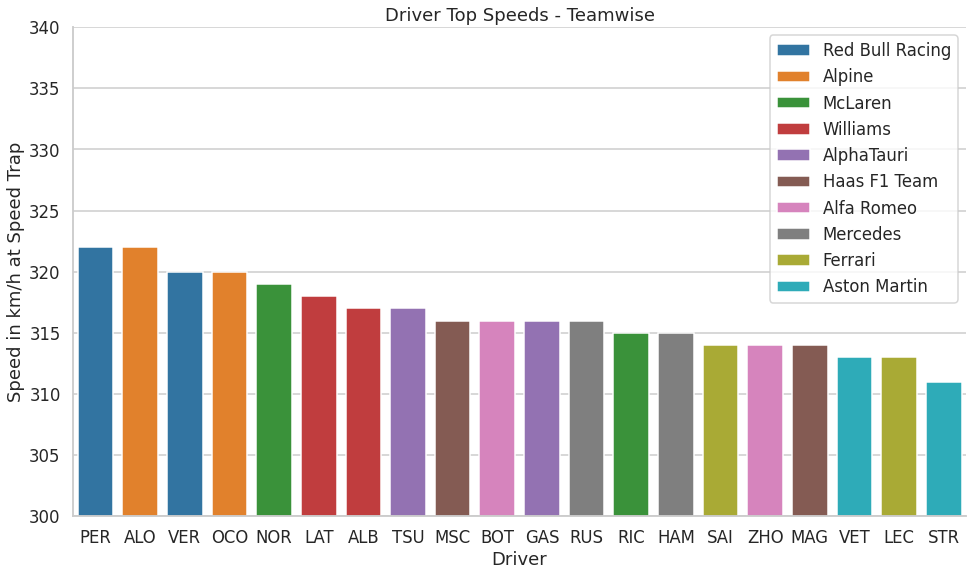

In [33]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('whitegrid')
sns.barplot(x = Speed_Trap.index, y = 'fastest_speed',data = Speed_Trap,hue='Team',dodge=False)
sns.despine()
sns.set_context('talk') #to make fonts bigger for easy readability
plt.title("Driver Top Speeds - Teamwise")
ax.set_xlabel('Driver')
ax.set_ylabel('Speed in km/h at Speed Trap')
plt.legend(loc='upper right')
ax.set(ylim=(300,340));
plt.savefig("driver top speeds 1.jpg")

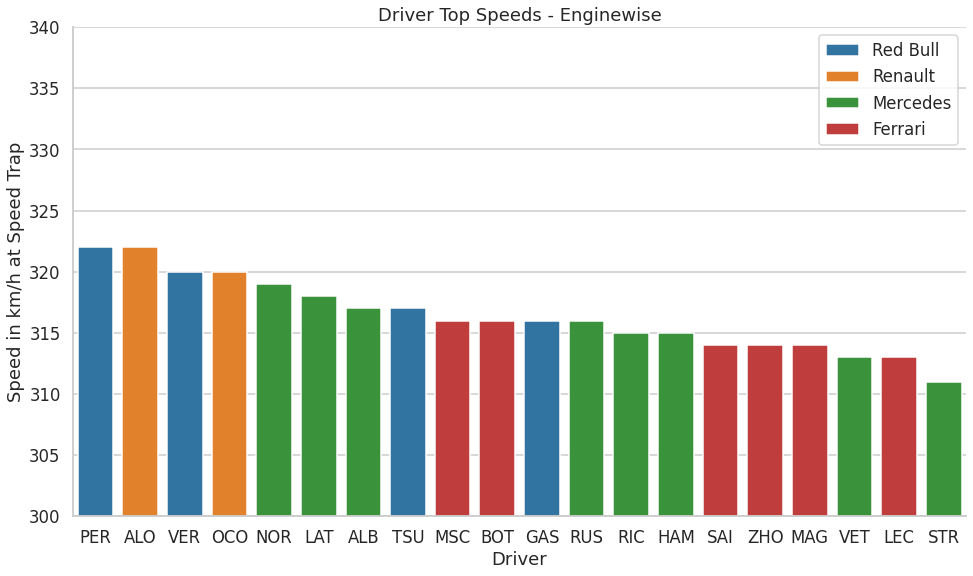

In [34]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('whitegrid')
sns.barplot(x = Speed_Trap.index, y = 'fastest_speed',data = Speed_Trap,hue='Engine',dodge=False)
#omitting Yuki Tsunoda as he did not set a time
sns.despine()
sns.set_context('talk') #to make fonts bigger for easy readability
plt.title("Driver Top Speeds - Enginewise")
ax.set_xlabel('Driver')
ax.set_ylabel('Speed in km/h at Speed Trap')
plt.legend(loc='upper right')
ax.set(ylim=(300,340));
plt.savefig("driver top speeds 2.jpg")

In [52]:
ric_lap = race.laps.pick_driver('RIC').pick_fastest()
nor_lap = race.laps.pick_driver('NOR').pick_fastest()
lec_lap = race.laps.pick_driver('LEC').pick_fastest()
ric_tel = ric_lap.get_car_data().add_distance()
nor_tel = nor_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()

In [35]:
alo_laps = race.laps.pick_driver('ALO')

In [50]:
alo_crash = alo_laps.loc[197].get_car_data().add_distance()

In [58]:
alo_crash

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-04-09 07:10:55.312,10776,310,8,100,False,12,car,0 days 00:00:00.158000,0 days 01:25:55.287000,13.605556
1,2022-04-09 07:10:55.472,10824,310,8,100,False,12,car,0 days 00:00:00.318000,0 days 01:25:55.447000,27.383333
2,2022-04-09 07:10:55.792,10887,313,8,100,False,12,car,0 days 00:00:00.638000,0 days 01:25:55.767000,55.205556
3,2022-04-09 07:10:56.071,10919,315,8,100,False,12,car,0 days 00:00:00.917000,0 days 01:25:56.046000,79.618056
4,2022-04-09 07:10:56.271,10967,315,8,100,False,12,car,0 days 00:00:01.117000,0 days 01:25:56.246000,97.118056
...,...,...,...,...,...,...,...,...,...,...,...
308,2022-04-09 07:12:17.631,0,0,4,0,False,9,car,0 days 00:01:22.477000,0 days 01:27:17.606000,4146.530278
309,2022-04-09 07:12:17.951,0,0,4,0,False,9,car,0 days 00:01:22.797000,0 days 01:27:17.926000,4146.530278
310,2022-04-09 07:12:18.231,0,0,4,0,False,9,car,0 days 00:01:23.077000,0 days 01:27:18.206000,4146.530278
311,2022-04-09 07:12:18.471,0,0,4,0,False,9,car,0 days 00:01:23.317000,0 days 01:27:18.446000,4146.530278


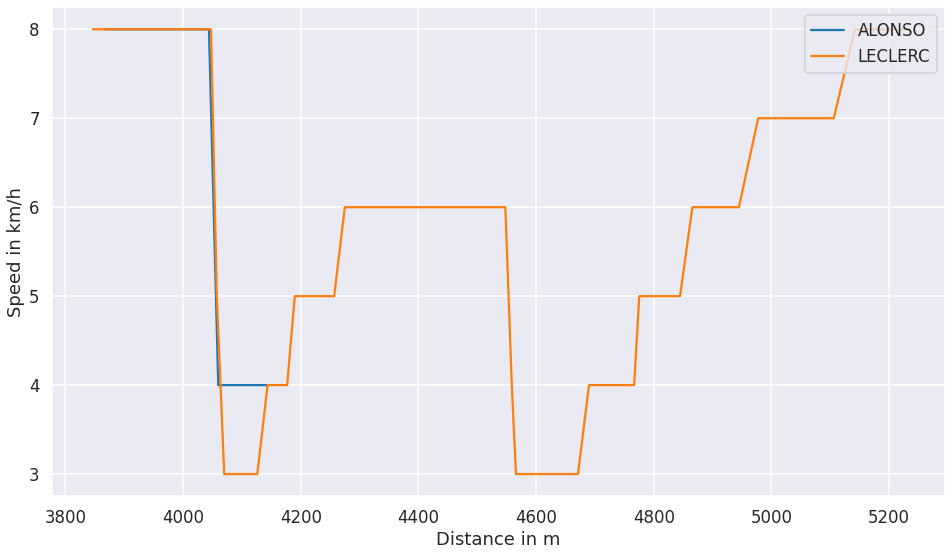

In [59]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
sns.lineplot(ax = ax, x = alo_crash['Distance'][200:300], y = alo_crash['nGear'][200:300],label='ALONSO')
sns.lineplot(ax = ax, x = lec_tel['Distance'][200:300], y = lec_tel['nGear'][200:300],label='LECLERC')
ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
plt.legend(loc='upper right');

In [29]:
nor_tel.query("Speed == Speed.max()")

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
6,2022-04-09 07:30:54.994,11083,314,8,99,False,14,car,0 days 00:00:02.140000,0 days 01:45:54.969000,184.150000
7,2022-04-09 07:30:55.354,11072,314,8,99,False,14,car,0 days 00:00:02.500000,0 days 01:45:55.329000,215.550000
8,2022-04-09 07:30:55.594,11068,314,8,99,False,14,car,0 days 00:00:02.740000,0 days 01:45:55.569000,236.483333
9,2022-04-09 07:30:55.754,11044,314,8,99,False,10,car,0 days 00:00:02.900000,0 days 01:45:55.729000,250.438889


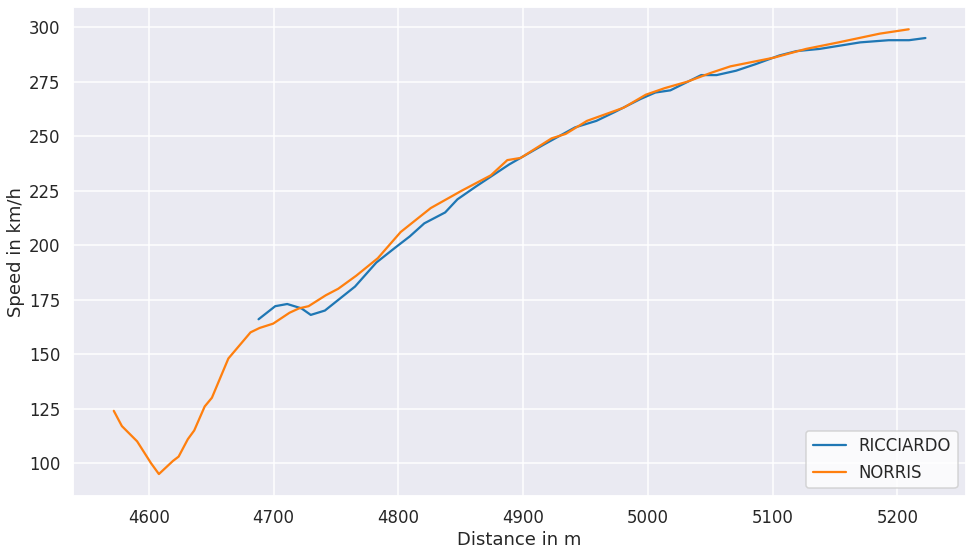

In [30]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('whitegrid')
sns.lineplot(ax = ax, x = ric_tel['Distance'][250:], y = ric_tel['Speed'][250:],label='RICCIARDO')
sns.lineplot(ax = ax, x = nor_tel['Distance'][250:], y = nor_tel['Speed'][250:],label='NORRIS')
ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
plt.legend(loc='lower right');

#annotate code : https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot/43375405#43375405

def annot_max_nor(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Max Speed: {:.0f}".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props_ric = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
    arrowprops=dict(arrowstyle="->",color='orange')
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props_ric, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.34,0.44), **kw)
    
def annot_max_ric(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Max Speed: {:.0f}".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props_ric = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
    arrowprops=dict(arrowstyle="->",color='blue')
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props_ric, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.24,0.54), **kw)

annot_max_nor(nor_tel['Distance'],nor_tel['Speed'])
annot_max_ric(ric_tel['Distance'],ric_tel['Speed'])